In [73]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [74]:
def gaussian_mixture_em(data, num_clusters, num_iterations=1, tol=1e-4):
    n, d = data.shape
    mu = np.random.rand(num_clusters, d)
    sigma = [np.identity(d) for _ in range(num_clusters)]
    pi = np.ones(num_clusters) / num_clusters

    for iteration in range(num_iterations):
        # E-Step: Compute responsibilities
        gamma = np.zeros((n, num_clusters))
        for k in range(num_clusters):
            mnpdf = multivariate_normal.pdf(data, mu[k], sigma[k])
            #print(mnpdf)
            gamma[:, k] = pi[k] * mnpdf
        print(gamma[-1])
        gamma /= np.sum(gamma, axis=1, keepdims=True)
        #print(gamma[-1])

        # M-Step: Update parameters
        Nk = np.sum(gamma, axis=0)
        old_mu = mu.copy()  # Store the old means for convergence checking
        old_sigma = np.array(sigma).copy()  # Store the old covariances for convergence checking
        for k in range(num_clusters):
            mu[k] = np.sum(gamma[:, k].reshape(-1, 1) * data, axis=0) / Nk[k]
            sigma[k] = np.dot((gamma[:, k].reshape(-1, 1) * (data - mu[k])).T, (data - mu[k])) / Nk[k]
            pi[k] = Nk[k] / n

        # Check for convergence
        if np.max(np.abs(mu - old_mu)) < tol and np.max(np.abs(sigma - old_sigma)) < tol:
            break

    return mu, sigma, pi

[0.04267054 0.02015868]


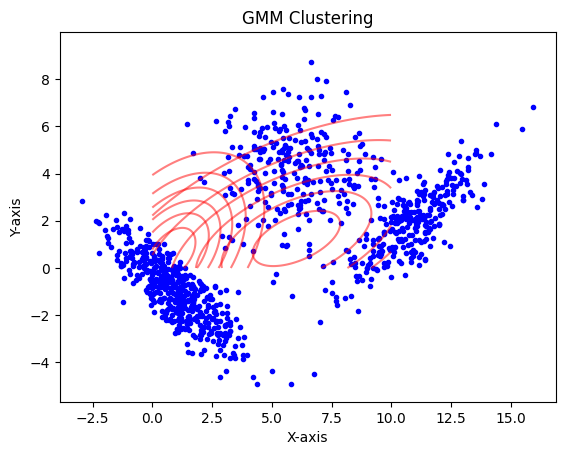

In [75]:
# Generate synthetic data
#np.random.seed(0)
'''data = np.concatenate([np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], 100),
                       np.random.multivariate_normal([7, 7], [[1, 0], [0, 1]], 100)])'''

data = np.loadtxt('GMD_Train.dat')
# Run the EM algorithm
num_clusters = 2
mu, sigma, pi = gaussian_mixture_em(data, num_clusters)

# Plot the data and the estimated Gaussian components
plt.scatter(data[:, 0], data[:, 1], c='b', marker='.')
for k in range(num_clusters):
    x, y = np.mgrid[0:10:0.01, 0:10:0.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal.pdf(pos, mu[k], sigma[k]), colors='r', alpha=0.5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('GMM Clustering')
plt.show()